# Problem Set - Statistics 3

## Task: Did survivors pay more for their tickets than those that didn’t? If so, to what signifance level?

Import Necessary Python Modules

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Data

## Bring In Titanic Passenger Data

In [2]:
td = pandas.read_csv('titanic_train.csv')
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The data we care about for this hypothesis(Survived, Fare) has no NaN values so no need to modify.

Setup a Survivor Data Set and a Non-Survivor Data Set.

In [3]:
surivors = td[td.Survived==1]
dead = td[td.Survived==0]

**Hypothesis**: There is a significant difference in fare payed between the surviors and the dead.

**Null-Hypothesis**: There is no difference in fare payed between the surviors and dead.

First establish a distribution of fares and number of surviors/dead

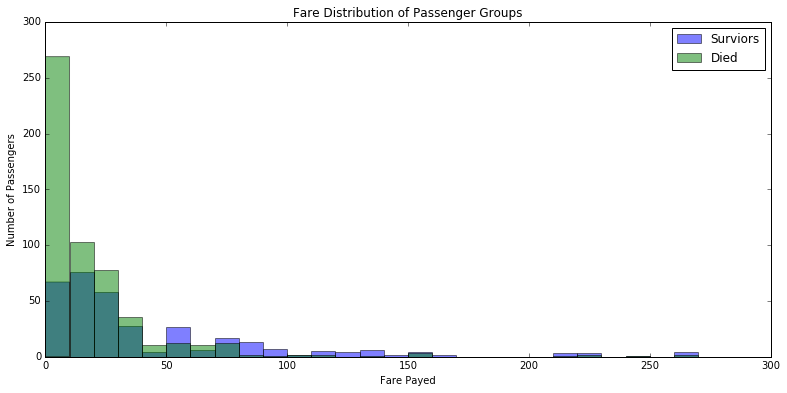

In [4]:
plt.figure(figsize=(13,6))
plt.hist(surivors.Fare, alpha=.5, bins=np.arange(0,300,10), label="Surviors")
plt.hist(dead.Fare, alpha=.5, bins=np.arange(0,300,10), label="Died")
plt.legend()
plt.title('Fare Distribution of Passenger Groups')
plt.xlabel('Fare Payed')
plt.ylabel('Number of Passengers')
plt.show()

Based off this graph it is clear that these two distributions are best compared using a Mann-Whitney U-test

In [5]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(surivors.Fare, dead.Fare)
print("Results:\n\tU-statistic: %.5f\n\tp-value: %g" % (u, p * 2))

Results:
	U-statistic: 129951.50000
	p-value: 9.10695e-22


Based off the high U-stat and the very low p-value we can reject the null hypothesis that there is no difference in fare payed between the survivors and the dead.

## Task: Find The Best Linear Model For The Relationship Between Fare and Age.

### The Gloal is to find the best slope to have the model
`Fare = slope * Age`
### Fit to the data

Looking again at the original data.

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are NaN ages which must be dealt with. In this case they will be ignored.

In [7]:
valid_age = td.Age[td.Age>0]
valid_fare = td.Fare[td.Age>0]

Visual This Data With a Scatter Plot focusing on the highest density area.

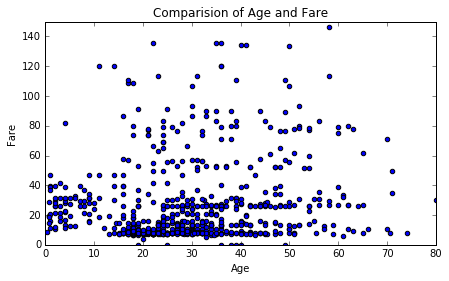

In [8]:
plt.figure(figsize=(7,4))
plt.scatter(valid_age, valid_fare)
plt.xlim(0,80)
plt.ylim(0,150)
plt.title('Comparision of Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Create a Linear Function and chi-squared statistic function. These will be used to find the best slope for the linear model.

In [9]:
def linear(data, slope):
    """A Linear Function Method"""
    return data * slope

def chi_sq(data, model, std, dof=1):
    """Function to Determine The chi-squared statistic"""
    return sum(((data - model)/std)**2) / (len(data) - dof)

The inital range of (-20,20,1) was narrowed down to (0,2,100) based off chi-squared being closer to 1.

In [10]:
slopes = np.linspace(0,2,100)
chi_results = []
for s in slopes:
    model_fare = linear(valid_age,s)
    chi_results.append(chi_sq(valid_fare, model_fare, valid_fare.std(), dof=1))
chi_results = np.array(chi_results)
print("Best Chi_Squared: {}".format(chi_results[chi_results.argmin()]))
print("Best Slope: {}".format(slopes[chi_results.argmin()]))

Best Chi_Squared: 1.03149230390484
Best Slope: 1.0101010101010102


Visualize the linear model over the data.

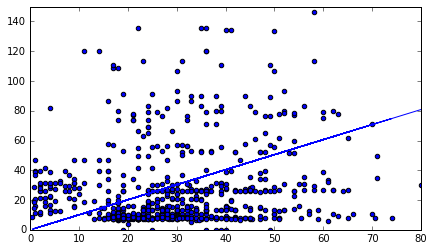

In [11]:
plt.figure(figsize=(7,4))
plt.scatter(td.Age,td.Fare)
plt.xlim(0,80)
plt.ylim(0,150)
plt.plot(td.Age,linear(td.Age,slopes[chi_results.argmin()]))
plt.show()